# Klasifikasi Dataset CIFAR 10 (Model CNN)

Contoh Deloyment untuk Domain Computer Vision (CV) <br>
Orbit Future Academy - AI Mastery - KM Batch 3 <br>
Tim Deployment dan Tim CV<br>
2022

## Modules dan Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot
import tensorflow.keras
from tensorflow.keras import backend as K
import tensorflow.keras.utils
import ssl
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,LeakyReLU
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
K.clear_session()

## Import Data

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [24]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
NUM_CLASSES = 10
fashion_mnist_classes = ["t-shirt/top", "trouser", "pullover", "dress", "coat", 
                   "sandal", "shirt", "sneaker", "bag", "ankle boot"]

## Exploratory Data Analysis (EDA)

In [25]:
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=3))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=3))

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (60000, 28, 28, 3) (60000,)
Test samples: (10000, 28, 28, 3) (10000,)


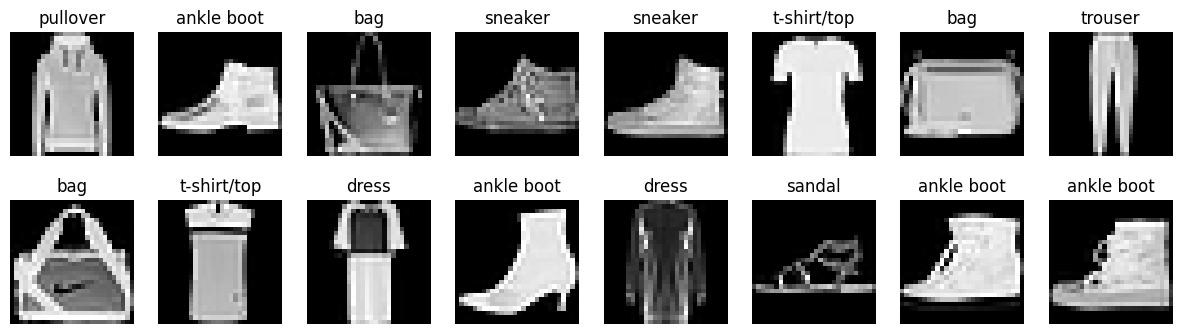

In [26]:
# Menampilkan Gambar pada Dataset Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(fashion_mnist_classes[y_train[random_index]])
plt.show()

## Menyiapkan Data

Kita akan melakukan normalisasi data input seperti berikut : $$x_{norm} = \frac{x}{255} - 0.5$$

Kita perlu melakukan konversi label kelas menjadi one-hot encoded vectors. Silahkan gunakan __keras.utils.to_categorical__.

In [27]:
# Normalisasi Input
x_train2 = (x_train / 255) - 0.5
x_test2  = (x_test / 255) - 0.5

# Mengkonversi Label Class menjadi One-Hot Encoded
y_train2 = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2  = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Membuat Arsitektur Model CNN 

In [29]:
def make_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [30]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                        

# Train model

In [31]:
INIT_LR    = 5e-3  
BATCH_SIZE = 32
EPOCHS     = 10

model = make_model() 

model.compile(
    loss      = 'categorical_crossentropy', 
    optimizer = tensorflow.keras.optimizers.Adamax(lr=INIT_LR), 
    metrics   = ['accuracy'] 
)

c:\Users\Indah Wardatunizza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
model.fit(
    x_train2,
    y_train2,  
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS,
    validation_data = (x_test2, y_test2),
    shuffle         = True,
    verbose         = 1,
)

Epoch 1/10
1875/1875 [==============================] - 286s 152ms/step - loss: 0.4374 - accuracy: 0.8417 - val_loss: 0.2815 - val_accuracy: 0.8976
Epoch 2/10
1875/1875 [==============================] - 443s 236ms/step - loss: 0.2871 - accuracy: 0.8956 - val_loss: 0.2555 - val_accuracy: 0.9073
Epoch 3/10
1875/1875 [==============================] - 455s 243ms/step - loss: 0.2522 - accuracy: 0.9089 - val_loss: 0.2442 - val_accuracy: 0.9145
Epoch 4/10
1875/1875 [==============================] - 417s 222ms/step - loss: 0.2363 - accuracy: 0.9137 - val_loss: 0.2302 - val_accuracy: 0.9176
Epoch 5/10
1875/1875 [==============================] - 424s 226ms/step - loss: 0.2239 - accuracy: 0.9187 - val_loss: 0.2172 - val_accuracy: 0.9210
Epoch 6/10
1875/1875 [==============================] - 426s 227ms/step - loss: 0.2110 - accuracy: 0.9232 - val_loss: 0.2286 - val_accuracy: 0.9207
Epoch 7/10
1875/1875 [==============================] - 412s 219ms/step - loss: 0.2021 - accuracy: 0.9265 - val_

## Prediksi

In [33]:
# Prediksi untuk Data Latih
y_pred_train            = model.predict(x_train2)
y_pred_train_classes    = np.argmax(y_pred_train, axis=1)
y_pred_train_max_probas = np.max(y_pred_train, axis=1)

1875/1875 [==============================] - 55s 29ms/step


In [34]:
# Prediksi untuk Data Uji
y_pred_test            = model.predict(x_test2)
y_pred_test_classes    = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 10s 32ms/step


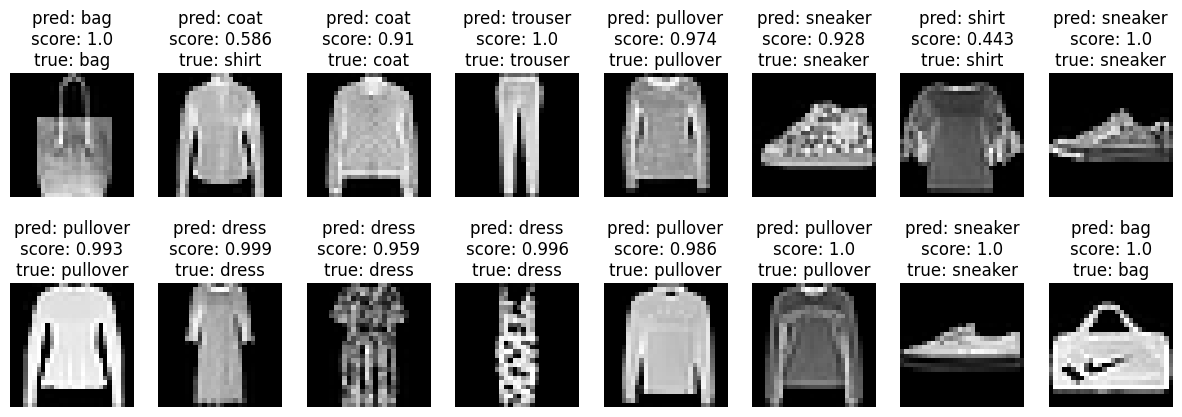

In [37]:
#Menampilkan Hasil Prediksi untuk Data Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        pred_label = fashion_mnist_classes[y_pred_train_classes[random_index]]
        pred_proba = y_pred_train_max_probas[random_index]
        true_label = fashion_mnist_classes[y_train[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

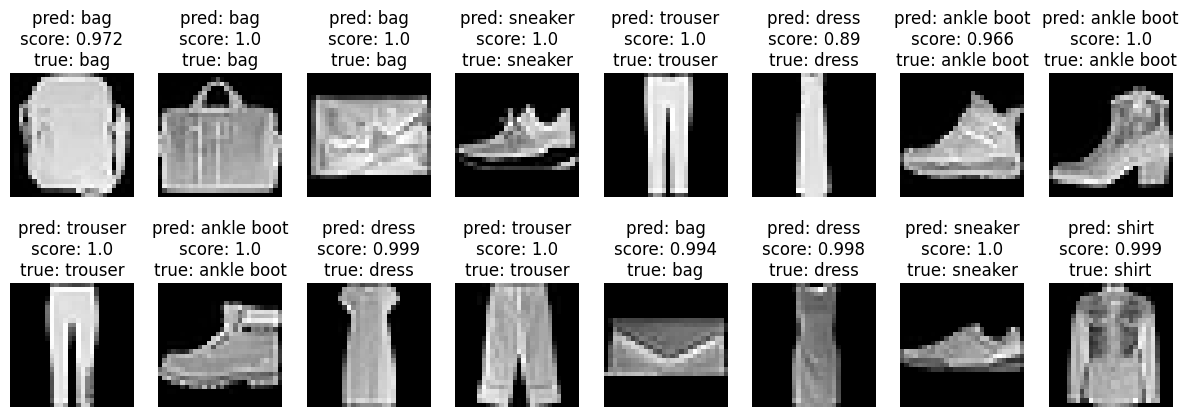

In [40]:
# Menampilkan Hasil Prediksi untuk Data Uji
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = fashion_mnist_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = fashion_mnist_classes[y_test[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

## Evaluate model

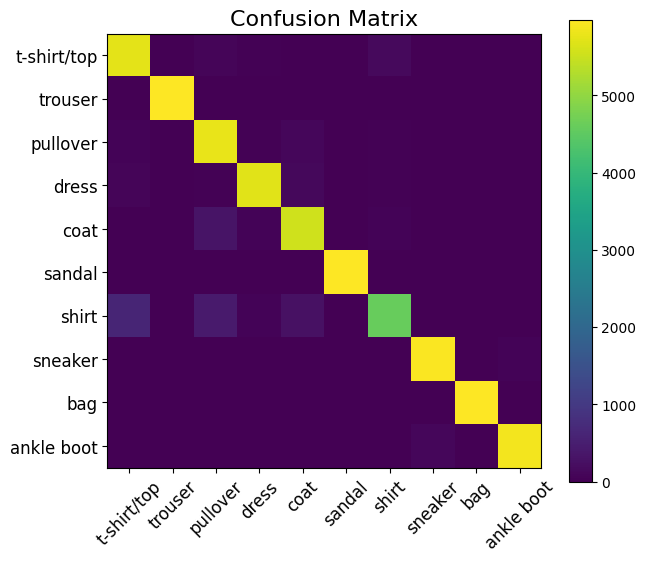

Train Accuracy: 0.9523


In [41]:
# Confusion Matrix dan Akurasi untuk Data Latih
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_train, y_pred_train_classes))
plt.xticks(np.arange(10), fashion_mnist_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), fashion_mnist_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))

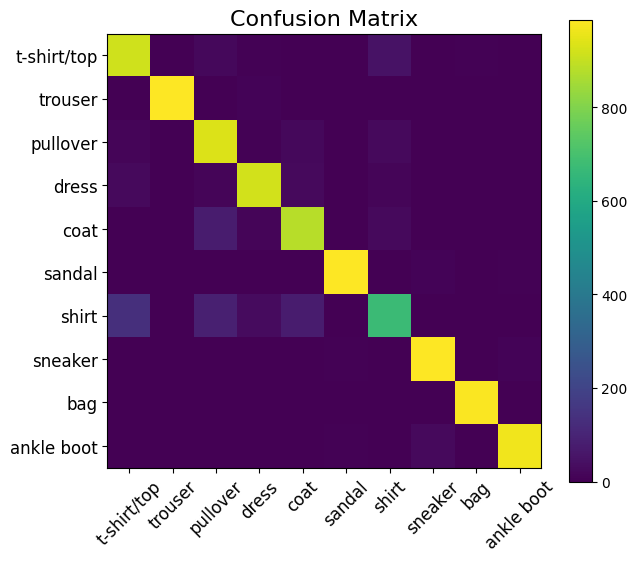

Test Accuracy: 0.9238


In [42]:
# Confusion Matrix dan Akurasi untuk Data Uji
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), fashion_mnist_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), fashion_mnist_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_classes))

## Menyimpan Model

In [43]:
model.save_weights("model_fashion_mnist_cnn_tf.h5")